<b>Aluno: Natan Ventura Menezes</b> <br>
<b>Mátricula: 2020065296</b>
# TP 1: Classificador com envoltória convexa
### Evoltória Convexa
A Envoltória convexa foi implementada pelo algoritmo de Jarvis, conforme visto em aula. A implementação do algoritmo foi escolhida devido sua facilidade de inplementação, sobretudo quando se trata de pontos colineares. <br>
O algoritmo consiste em :<br>
1 - Pegar o ponto mais a esquerda e adicionar à envoltória<br>
2 - Pegar o ponto mais 'anti-horário' dentre os outros pontos e adiciona-lo ao envoltório<br>
3 - Repetir o passo 3 até encontrar novamente o ponto inicial<br>
Complexidade: O(n*h), sendo n o número de pontos e h o número de pontos no envoltório<br>
### Verificar se um ponto está dentro da encoltória
Para verificar se um ponto P está dentro da envoltória E, o algoritmo utilizado faz o seguinte:<br>
1 - Verifica se o ponto P está nas arestas da envoltória E, caso esteja retrona verdadeiro<br>
2 - Caso contrário, cria-se um uma envoltória E' com os pontos da envoltória E e o ponto P. Caso o ponto esteja fora da envoltória, então a envoltória terá um ponto P, caso contrário ele está fora da envoltória.<br>
Complesxidade: O(h), sendo h os pontos externos da enoltória E<br>
### Verificar separabilidade de duas envoltórias
Seja E1 e E2 duas envoltórias. O algoritmo faz o seguinte:<br>
1 - Para cada ponto de E1 verifica-se se ele está dentro de E2 pelo algoritmo descrito antes<br>
2 - Verifica-se também para cada ponto de E2 se ele está em E1<br>
3 - Caso nenhum ponto esteja contido na outra envoltória retorna-se verdadeiro. Caso contrário retorna-se falso.<br>
Complexidade: O(h1²*h2 + h2²*h1), sendo h1 e h2 os pontos das envoltórias E1 e E2, respectivamente.<br>
### Encontrar os ponto mais próximo entre os dois envoltórios
Seja  E1 e E2 duas envoltórias:<br>
1 - Para cada par de pontos P1 e P2 em E1 e E2, respectivamente, calculamos a ditância entre eles<br>
2 - Caso sejam menor que a menor distância atual, então salvamos P1 e P2.
Complexidade: (h1*h2), sendo h1 e h2 os pontos das envoltórias E1 e E2, respectivamente.<br>
### Encontrar a reta perpendicular aos pontos de mais próximos, que cruza o ponto médio deles
Sejam P1 e P2 os pontos de menot distância entre os polígonos:<br>
1 - Encontrar os coeficientes da reta (P1,P2)<br>
2 - A partir deles, resolvendo equações algébricas simples, calcular os coeficientes da reta perpendicular<br>
3 - Calcular um ponto pertencente à essa reta que cruz o eixo zero e retorna-lo
Complexidade: O(1)<br>
### Classificar um ponto
Dado um novo ponto P:<br>
1 - Verificar de qual lado da reta ele se encontra  (horário ou anti horário) <br>
2 - Classifica-lo conforme ao rotúlo do envoltório desse lado<br>
Complexidade: O(1)<br>
### Calular métricas
Calcular métricas conforme suas respectivas fórmulas matématicas<br>
Complesxidade: O(1)<br>
<br><br>
Complexidade final: O(h1²*h2 + h2²*h1 + N1*h1 + N2*H2), sendo N1 e N2 o número de pontos das classes 1 e 2, respectivamente, e h1 e h2 sendo os pontos dos envoltórios 1 e 2. 
 

# Testes em um conjuntos de dados de flores
Foi realizado um teste num conjunto de dados de flores Iris <br>
<a href=https://archive.ics.uci.edu/ml/datasets/iris>Fonte</a> <br>
#### Descrição dos dados
O conjunto de dados foi utilizado por R.A. Fisher em 1936. Ele possui 3 espécies de flor e 50 instâncias de cada. Ele possui também 5 colunas indicando: id, altura da sepala, largura da sepala, altura da petala, largura da petala. <br>
#### Simplificação
Para simplificar nossa análise, iremos utilizar apenas duas classes de flor e utilizar apenas dois atributos em cada caso. assim será aplicável em nosso algoritmo. <br>
As classes utilizadas serão: Iris-setosa e Iris-versicolor.

In [1]:
from classifier import *
from convex_hull import *
from point_primitives import *
from line_primitives import *
from utils import *

In [2]:
# Abrindo o arquivo e separando em 3 datasets
fileName = 'Iris.csv'
l1 = 'Iris-setosa'
l2 = 'Iris-versicolor'
f = open(fileName, "r",encoding='utf-8-sig')
points1 = []
points2 = []

dataSet1 = []
dataSet2 = []
dataSet3 = []
for line in f:
    id,sepalLen,sepalWid,petalLen,petalWid,label = line.rstrip('\n').split(',')
    dataSet1.append(Point(float(petalWid),float(petalLen),label))
    dataSet2.append(Point(float(sepalWid),float(sepalLen),label))
    dataSet3.append(Point(float(petalLen),float(sepalWid),label))

### Legenda
<ul>
    <li>Polígono laranja: Polígono correspondente à classe iris-setosa</li>
    <li>Pontos laranjas: Pontos de treino correspondentes à classe iris-setosa</li>
    <li>Pontos vermelhos: Pontos de teste correspondentes à classe iris-setosa</li>
    <li>Polígono azul: Polígono correspondente à classe iris-versicolor</li>
    <li>Pontos azuis: Pontos de treino correspondentes à classe iris-versicolor</li>
    <li>Pontos roxos: Pontos de teste correspondentes à classe iris-versicolor</li>
    <li>Linha verde: Linha que une os dois pontos mais próximos entre os polígonos</li>
    <li>Linha vermelha: Eixo do classificador que separa os polígonos</li>
</ul>

## Largula da Pétala vs Altura da Petála

Accuracy:  1.0
Precision:  1.0
Recall 1.0
F1:  1.0


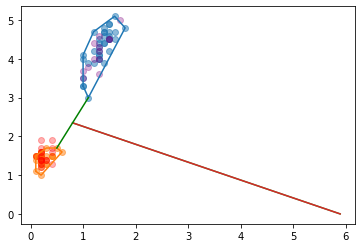

In [3]:
sample(dataSet1,l1,l2)

Vemos que os dados possuem uma boa separabilidade, possuindo um resultado "perfeito"

# Largula da Sépala vs Altura da Sépala

Accuracy:  0.5666666666666667
Precision:  1.0
Recall 0.07142857142857142
F1:  0.13333333333333333


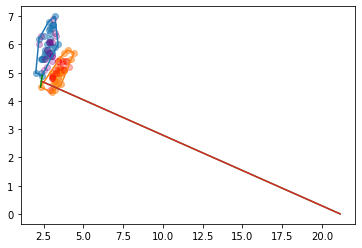

In [4]:
sample(dataSet2,l1,l2)

Neste caso, os dados mostram-se não tão bem separáveis como no caso anterior. Temos piores métricas que no caos anterior.

# Altura da Pétala vs Largura da Sépala

Accuracy:  1.0
Precision:  1.0
Recall 1.0
F1:  1.0


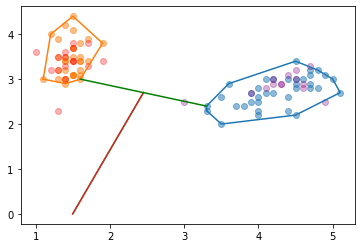

In [5]:
sample(dataSet3,l1,l2)

Os dados também apresentam uma divisão que permite uma classificação 'Perfeita'

# Testes aleatórios
Para teste de corretude do algoritmo foram feitos testes aleatorizados. As instâncias são geradas aleatoriamente, apesar de serem geradas num intervalo que permite que a maioria dos casos sejam linearmente separáveis. Assim, temos 10 testes com 100 instâncias cada:

/home/natan/Documents/convex-hull-classifier/classifier.py:34: UserWarning: Data are not independent, it's impossible to create classifier.
  warnings.warn("Data are not independent, it's impossible to create classifier.")


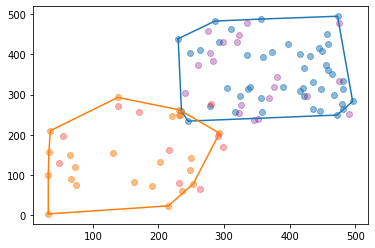

Accuracy:  0.7333333333333333
Precision:  0.4666666666666667
Recall 1.0
F1:  0.6363636363636364


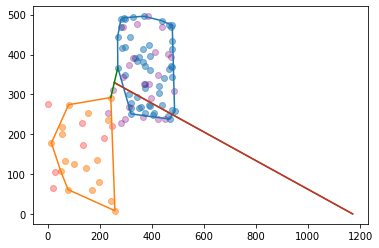

Accuracy:  0.3
Precision:  0.2727272727272727
Recall 0.1875
F1:  0.2222222222222222


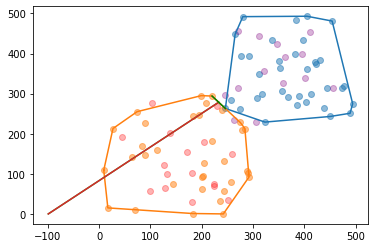

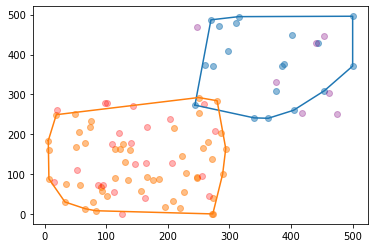

Accuracy:  0.7666666666666667
Precision:  0.625
Recall 0.9090909090909091
F1:  0.7407407407407406


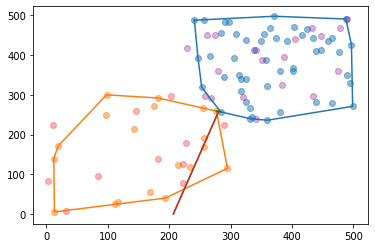

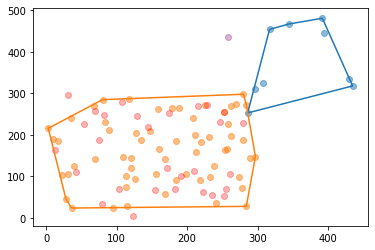

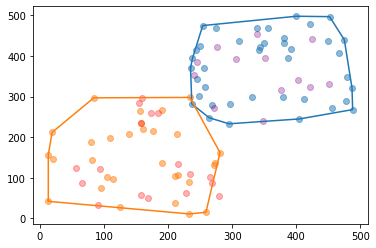

Accuracy:  0.9666666666666667
Precision:  1.0
Recall 0.5
F1:  0.6666666666666666


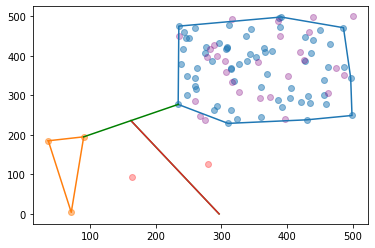

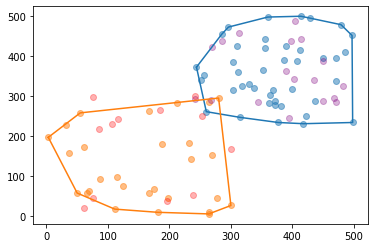

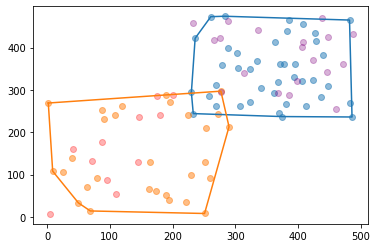

In [6]:
randomTests(10,100)
